In [1]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import SimpleITK as sitk

from starter_code.utils import load_case

%matplotlib inline

# Preprocess imaging (volume)

In [2]:
vol_path = '/data/kits19/data/case_00100/imaging.nii.gz'

In [3]:
data_itk = sitk.ReadImage(vol_path)

In [4]:
vol = sitk.GetArrayFromImage(data_itk)

print("volume shape:")
print(vol.shape)

volume shape:
(512, 512, 470)


In [5]:
spacing = np.array(data_itk.GetSpacing())

print("spacing:")
spacing

spacing:


array([1.        , 0.82421875, 0.82421875])

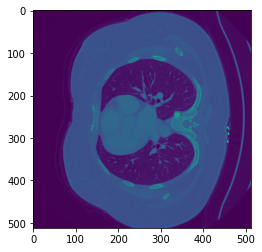

In [6]:
plt.imshow(vol[:, :, 0])

In [7]:
size = np.array(data_itk.GetSize())

print("size:")
print(size)

size:
[470 512 512]


In [8]:
new_spacing = np.array([3.22, 1.62, 1.62])

new_size = (size * (spacing / new_spacing)).astype(int)

print("new size:")
print(new_size)

new size:
[145 260 260]


In [9]:
data_resampled = sitk.Resample(
    data_itk, new_size.tolist(), sitk.Transform(),
    sitk.sitkBSplineResamplerOrder3, data_itk.GetOrigin(), new_spacing,
    data_itk.GetDirection(), 0.0, data_itk.GetPixelID())

In [10]:
vol_resampled = sitk.GetArrayFromImage(data_resampled)

print("new volume shape:")
print(vol_resampled.shape)

new volume shape:
(260, 260, 145)


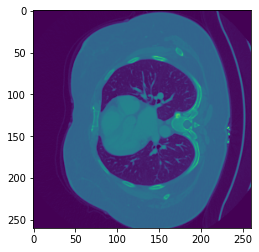

In [11]:
plt.imshow(vol_resampled[:, :, 0])

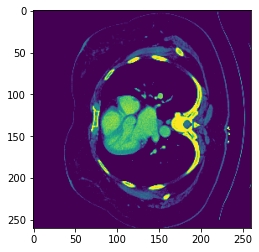

In [12]:
vol_preprocessed = np.clip(vol_resampled, a_min=-79, a_max=304)

vol_preprocessed = (vol_preprocessed - 101.) / 76.9

plt.imshow(vol_preprocessed[:, :, 0])

## Preprocess Label

In [13]:
label_path = '/data/kits19/data/case_00100/segmentation.nii.gz'

In [14]:
label_itk = sitk.ReadImage(label_path)

In [15]:
vol_label = sitk.GetArrayFromImage(label_itk)

print("volume shape:")
print(vol_label.shape)

volume shape:
(512, 512, 470)


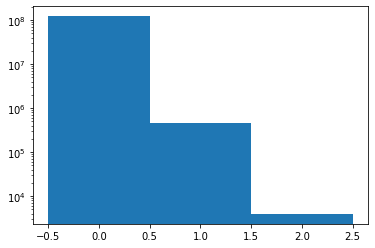

In [16]:
plt.hist(vol_label.flatten(), bins=3, range=(-0.5, 2.5), log=True);

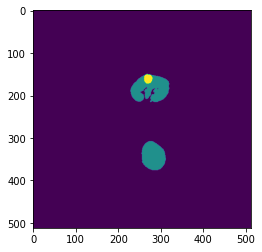

In [17]:
plt.imshow(vol_label[:, :, 195])

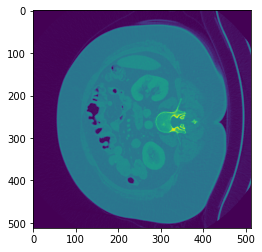

In [18]:
plt.imshow(vol[:, :, 195])

In [19]:
label_resampled = sitk.Resample(
    label_itk, new_size.tolist(), sitk.Transform(),
    sitk.sitkNearestNeighbor, label_itk.GetOrigin(), new_spacing,
    label_itk.GetDirection(), 0.0, label_itk.GetPixelID())

In [20]:
vol_label_resampled = sitk.GetArrayFromImage(label_resampled)

print("new volume shape:")
print(vol_label_resampled.shape)

new volume shape:
(260, 260, 145)


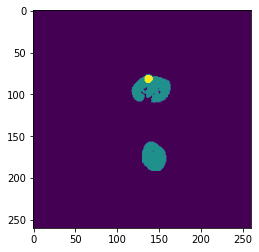

In [21]:
plt.imshow(vol_label_resampled[:, :, 60])

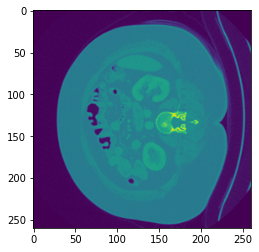

In [22]:
plt.imshow(vol_resampled[:, :, 60])